In [1]:
import pandas as pd
from pathlib import Path
import os

DATA = Path(os.environ["DATA"])
csv_path = DATA / "climate" / "ERA5" / "ERA5_country_climate_1971_2010.csv"

df = pd.read_csv(csv_path)
print(df.head())
print("\nColumns:")
print(df.columns.tolist())
print("\nInfo:")
print(df.info())


   iso  year   temp1_ERA5     temp2_ERA5    temp3_ERA5    temp4_ERA5  \
0  ABW  1981  9763.343599  261354.207795  7.001398e+06  1.876997e+08   
1  ABW  1982  9585.779521  251947.305983  6.627308e+06  1.744644e+08   
2  ABW  1983  9717.795798  258946.272399  6.905867e+06  1.843287e+08   
3  ABW  1984  9561.113524  249961.557547  6.539984e+06  1.712459e+08   
4  ABW  1985  9524.383498  248797.954572  6.506106e+06  1.703168e+08   

   hdd20_ERA5   cdd20_ERA5  polyAbove1_ERA5  polyAbove2_ERA5  polyAbove3_ERA5  \
0         0.0  2463.344282      2463.344282    115354.214864     4.081398e+06   
1         0.0  2285.779304      2285.779304    105947.293840     3.707307e+06   
2         0.0  2417.796331      2417.796331    112946.260256     3.985867e+06   
3         0.0  2241.113310      2241.113310    103561.548475     3.611984e+06   
4         0.0  2224.382531      2224.382531    102797.961641     3.586106e+06   

   polyAbove4_ERA5  polyBelow1_ERA5  polyBelow2_ERA5  polyBelow3_ERA5  \
0     1

In [2]:
print(df["year"].min(), df["year"].max())
print(df["year"].value_counts().sort_index())


1981 2010
year
1981    245
1982    245
1983    245
1984    245
1985    245
1986    245
1987    245
1988    245
1989    245
1990    245
1991    245
1992    245
1993    245
1994    245
1995    245
1996    245
1997    245
1998    245
1999    245
2000    245
2001    245
2002    245
2003    245
2004    245
2005    245
2006    245
2007    245
2008    245
2009    245
2010    245
Name: count, dtype: int64


In [3]:
clim_cols = [c for c in df.columns if c not in ("iso", "year")]
print(df[clim_cols].describe().T)


                  count          mean           std           min  \
temp1_ERA5       7350.0  7.133409e+03  2.761329e+03 -4.386630e+03   
temp2_ERA5       7350.0  1.719672e+05  8.296584e+04  1.332742e+04   
temp3_ERA5       7350.0  4.240889e+06  2.571657e+06 -2.487012e+06   
temp4_ERA5       7350.0  1.105362e+08  7.449410e+07  1.005958e+06   
hdd20_ERA5       7350.0  1.435364e+03  1.937973e+03  0.000000e+00   
cdd20_ERA5       7350.0  1.264107e+03  9.769331e+02  0.000000e+00   
polyAbove1_ERA5  7350.0  1.264107e+03  9.769331e+02  0.000000e+00   
polyAbove2_ERA5  7350.0  5.951371e+04  4.727199e+04  0.000000e+00   
polyAbove3_ERA5  7350.0  2.128612e+06  1.753614e+06  0.000000e+00   
polyAbove4_ERA5  7350.0  6.863935e+07  5.938238e+07  0.000000e+00   
polyBelow1_ERA5  7350.0  1.435364e+03  1.937973e+03  0.000000e+00   
polyBelow2_ERA5  7350.0  3.363985e+04  3.970583e+04  0.000000e+00   
polyBelow3_ERA5  7350.0  8.095896e+05  9.553561e+05  0.000000e+00   
polyBelow4_ERA5  7350.0  1.654051e

In [4]:
for iso in ["USA", "BRA", "CHN", "IND", "ZAF"]:
    print("\n", iso)
    print(df[df["iso"] == iso].sort_values("year")[["year", "temp1_ERA5", "hdd20_ERA5", "cdd20_ERA5"]].head())



 USA
      year   temp1_ERA5   hdd20_ERA5  cdd20_ERA5
6780  1981  5041.609917  2780.269615  521.879558
6781  1982  4963.001829  2828.069535  491.071342
6782  1983  5000.180037  2867.222775  567.402822
6783  1984  5055.712865  2787.945983  523.658845
6784  1985  4983.113602  2837.528867  520.642509

 BRA
     year   temp1_ERA5  hdd20_ERA5   cdd20_ERA5
900  1981  8186.722081  292.751463  1179.473604
901  1982  8247.771445  226.630288  1174.401816
902  1983  8316.794310  254.008944  1270.803253
903  1984  8373.002033  233.375789  1286.377863
904  1985  8199.962500  263.937895  1163.900445

 CHN
      year   temp1_ERA5   hdd20_ERA5  cdd20_ERA5
1200  1981  5321.102571  2683.396625  704.499206
1201  1982  5381.355850  2563.354939  644.710772
1202  1983  5371.159912  2632.932186  704.092110
1203  1984  5129.827691  2829.418021  639.245716
1204  1985  5198.988834  2776.812477  675.801338

 IND
      year   temp1_ERA5  hdd20_ERA5   cdd20_ERA5
3000  1981  9183.324372  243.146033  2126.470481
30

In [8]:
# Path from the energy repo; adjust if needed
ERA_path = Path(os.environ["DATA"]) / "climate" / "ERA5" / "ERA5_country_climate_1971_2010.csv"
gmfd_path = Path("/user/ab5405/summeraliaclimate/code/energy_consumption/energy_data_release_2021oct21/DATA/regression/GMFD_TINV_clim_regsort.dta")

era = pd.read_csv(ERA_path)
gmfd = pd.read_stata(gmfd_path)

# Check GMFD keys
print(gmfd.columns[:30])

# Keep only country/year + GMFD HDD/CDD
gmfd_small = gmfd[["country", "year", "hdd20_GMFD", "cdd20_GMFD"]].drop_duplicates()

# Rename country -> iso so it matches ERA
gmfd_small = gmfd_small.rename(columns={"country": "iso"})

# Merge on iso-year overlap
merged = gmfd_small.merge(
    era[["iso", "year", "hdd20_ERA5", "cdd20_ERA5"]],
    on=["iso", "year"],
    how="inner",
)

print(merged[["hdd20_GMFD", "hdd20_ERA5", "cdd20_GMFD", "cdd20_ERA5"]].describe())

print("\nCorrelations:")
print(merged[["hdd20_GMFD", "hdd20_ERA5", "cdd20_GMFD", "cdd20_ERA5"]].corr())


Index(['country', 'year', 'flow', 'product', 'load_pc', 'lgdppc_MA15', 'pop',
       'FEtag', 'hdd20_other_GMFD', 'hdd20_GMFD', 'cdd20_other_GMFD',
       'cdd20_GMFD', 'polyBelow4_x_hdd_other_GMFD', 'polyBelow4_x_hdd_GMFD',
       'polyBelow3_x_hdd_other_GMFD', 'polyBelow3_x_hdd_GMFD',
       'polyBelow2_x_hdd_other_GMFD', 'polyBelow2_x_hdd_GMFD',
       'polyBelow1_x_hdd_other_GMFD', 'polyBelow1_x_hdd_GMFD',
       'polyAbove4_x_cdd_other_GMFD', 'polyAbove4_x_cdd_GMFD',
       'polyAbove3_x_cdd_other_GMFD', 'polyAbove3_x_cdd_GMFD',
       'polyAbove2_x_cdd_other_GMFD', 'polyAbove2_x_cdd_GMFD',
       'polyAbove1_x_cdd_other_GMFD', 'polyAbove1_x_cdd_GMFD',
       'polyAbove4_other_GMFD', 'polyAbove4_GMFD'],
      dtype='object')
        hdd20_GMFD   hdd20_ERA5   cdd20_GMFD   cdd20_ERA5
count  3649.000000  3650.000000  3649.000000  3650.000000
mean   1797.940201  1760.104115  1252.012774  1040.487479
std    1811.984959  1844.752239   965.970452   909.713784
min       0.000000     0.000

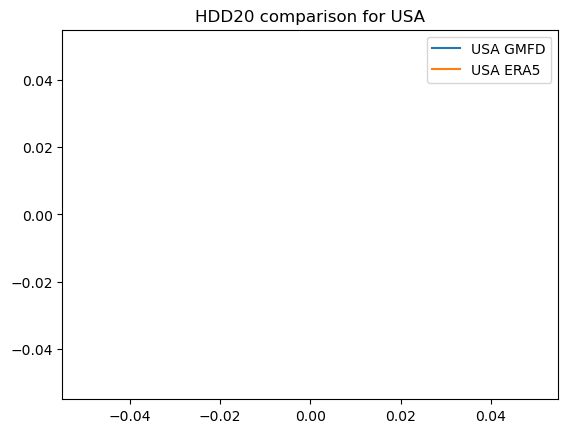

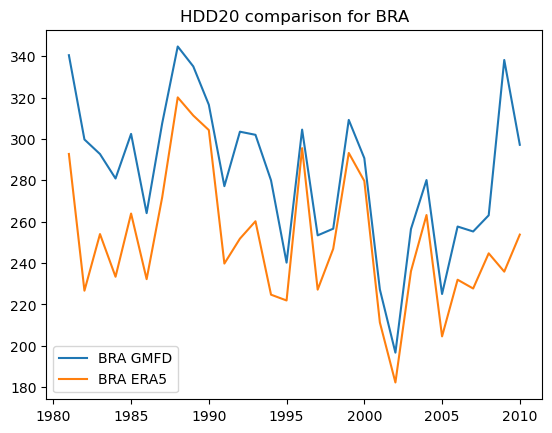

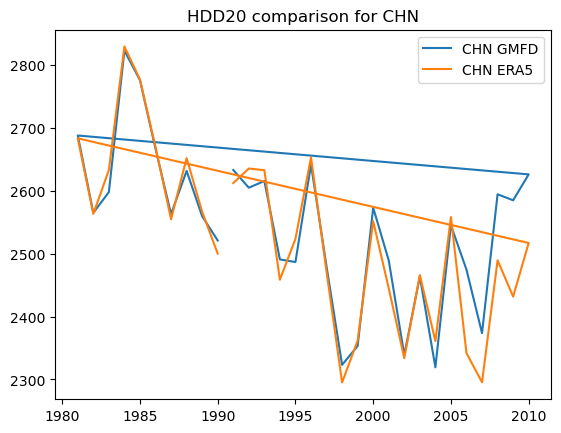

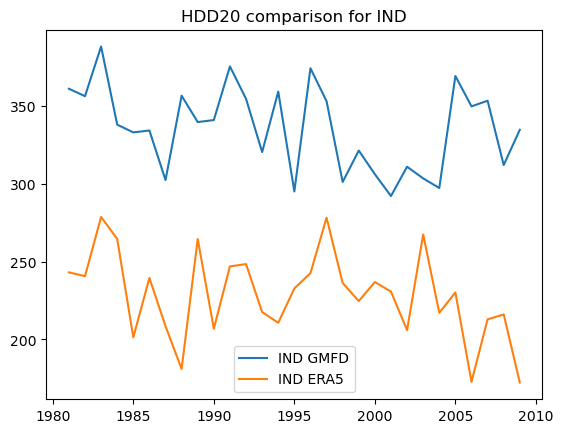

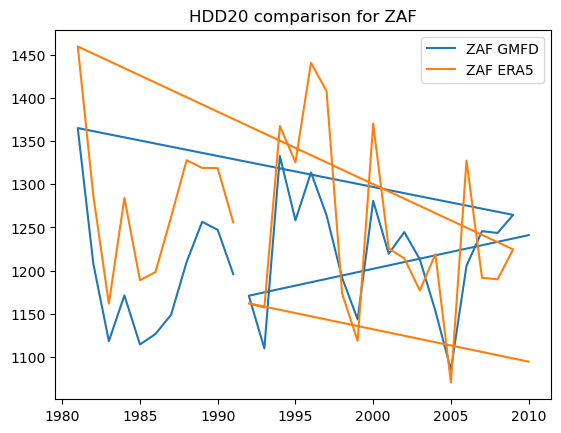

In [9]:
import matplotlib.pyplot as plt

for iso in ["USA", "BRA", "CHN", "IND", "ZAF"]:
    sub = merged[merged.iso == iso]
    plt.plot(sub.year, sub.hdd20_GMFD, label=f"{iso} GMFD")
    plt.plot(sub.year, sub.hdd20_ERA5, label=f"{iso} ERA5")
    plt.title(f"HDD20 comparison for {iso}")
    plt.legend()
    plt.show()


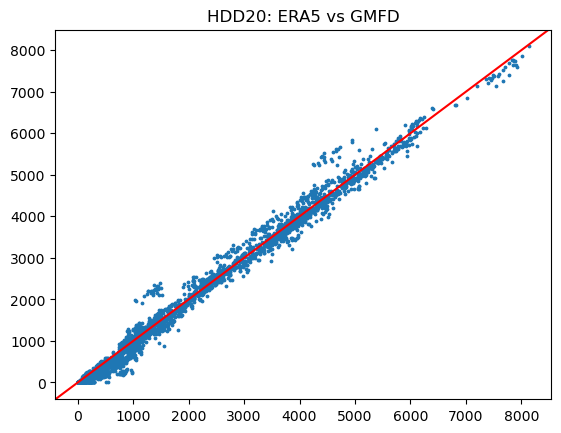

In [10]:
plt.scatter(merged.hdd20_GMFD, merged.hdd20_ERA5, s=3)
plt.axline((0,0), slope=1, color="red")
plt.title("HDD20: ERA5 vs GMFD")

plt.show()


In [11]:
import pandas as pd
from pathlib import Path
import os

DATA = Path(os.environ["DATA"])

products = {
    "ERA5": DATA / "climate" / "ERA5" / "ERA5_country_climate_1971_2010.csv",
    "GMFD": DATA / "climate" / "GMFD" / "GMFD_country_climate_1971_2010.csv",
    "JRA_3Q": DATA / "climate" / "JRA_3Q" / "JRA_3Q_country_climate_1971_2010.csv",
}

dfs = {prod: pd.read_csv(path) for prod, path in products.items()}


In [13]:
gmfd_path = Path("/user/ab5405/summeraliaclimate/code/energy_consumption/energy_data_release_2021oct21/DATA/regression/GMFD_TINV_clim_regsort.dta")
gmfd = pd.read_stata(gmfd_path)
gmfd = gmfd.rename(columns={"country": "iso"})


In [14]:
def compare_products(df_new, df_old, suffix_new, suffix_old="GMFD"):
    # Keep only overlapping years + countries
    merged = (
        df_old.merge(df_new, on=["iso", "year"], how="inner")
    )

    # Build comparison table for HDD + CDD
    comp = pd.DataFrame({
        f"hdd_{suffix_old}": merged[f"hdd20_{suffix_old}"],
        f"hdd_{suffix_new}": merged[f"hdd20_{suffix_new}"],
        f"cdd_{suffix_old}": merged[f"cdd20_{suffix_old}"],
        f"cdd_{suffix_new}": merged[f"cdd20_{suffix_new}"],
    })

    # Summary stats
    print("\n========================================")
    print(f"  Comparison: {suffix_new} vs {suffix_old}")
    print("========================================\n")
    print(comp.describe(), "\n")

    # Correlations
    print("Correlations:\n", comp.corr(), "\n")

    return comp


In [15]:
compare_products(dfs["ERA5"], gmfd, "ERA5")





  Comparison: ERA5 vs GMFD

          hdd_GMFD     hdd_ERA5     cdd_GMFD     cdd_ERA5
count  6534.000000  6535.000000  6534.000000  6535.000000
mean   1682.873800  1639.325131  1328.735438  1110.715583
std    1801.434916  1831.883747   962.617250   910.577684
min       0.000000     0.000000     0.000000     0.000000
25%     144.778605    55.568496   408.630935   275.523308
50%     958.334543   888.939513  1206.027069   879.454068
75%    2970.808248  3021.237292  2208.123436  1927.195140
max    8132.451706  8089.204620  3707.528595  3440.595843 

Correlations:
           hdd_GMFD  hdd_ERA5  cdd_GMFD  cdd_ERA5
hdd_GMFD  1.000000  0.995322 -0.834678 -0.781326
hdd_ERA5  0.995322  1.000000 -0.827265 -0.777591
cdd_GMFD -0.834678 -0.827265  1.000000  0.970504
cdd_ERA5 -0.781326 -0.777591  0.970504  1.000000 



,hdd_GMFD,hdd_ERA5,cdd_GMFD,cdd_ERA5
0,466.988846,167.646360,1273.403740,754.234510
1,463.771421,200.709517,1246.216820,631.255645
2,450.047823,160.343219,1312.409767,745.366972
3,433.982990,192.917234,1321.793137,759.127928
4,448.450288,196.320889,1295.622257,686.958740
...,...,...,...,...
6530,715.246174,471.404715,1325.654148,876.235670
6531,759.691339,533.569641,1105.668209,595.917112
6532,768.276293,524.067001,1067.376194,587.093967
6533,698.822643,459.769934,1217.112591,644.657504


In [19]:
from pathlib import Path
import os
import pandas as pd

DATA = Path(os.environ["DATA"])

# 1. Load the original GMFD energy panel
gmfd = pd.read_stata(gmfd_path)

# Make sure we have an iso column
if "iso" not in gmfd.columns and "country" in gmfd.columns:
    gmfd = gmfd.rename(columns={"country": "iso"})

# 2. Build a *climate-only* GMFD panel from the original data
gmfd_clim = (
    gmfd[["iso", "year", "hdd20_GMFD", "cdd20_GMFD"]]
    .drop_duplicates()
)

# 3. Load your **new** GMFD country–year climate CSV
gmfd_new = pd.read_csv(
    DATA / "climate" / "GMFD" / "GMFD_country_climate_1971_2010.csv"
)

# Keep only the GMFD climate columns we want to compare
gmfd_new_clim = gmfd_new[["iso", "year", "hdd20_GMFD", "cdd20_GMFD"]]

# 4. Merge with explicit suffixes
merged = gmfd_clim.merge(
    gmfd_new_clim,
    on=["iso", "year"],
    how="inner",
    suffixes=("_old", "_new"),
)

# 5. Build a comparison table
comp = merged[[
    "iso", "year",
    "hdd20_GMFD_old", "hdd20_GMFD_new",
    "cdd20_GMFD_old", "cdd20_GMFD_new",
]]

print(comp.head())

# 6. Summary stats and correlations
print("\nSummary stats:")
print(comp[[
    "hdd20_GMFD_old", "hdd20_GMFD_new",
    "cdd20_GMFD_old", "cdd20_GMFD_new",
]].describe())

print("\nCorrelations:")
print(comp[[
    "hdd20_GMFD_old", "hdd20_GMFD_new",
    "cdd20_GMFD_old", "cdd20_GMFD_new",
]].corr())


   iso  year  hdd20_GMFD_old  hdd20_GMFD_new  cdd20_GMFD_old  cdd20_GMFD_new
0  AGO  1981      466.988846      229.237384     1273.403740      663.063069
1  AGO  1982      463.771421      218.018007     1246.216820      627.714564
2  AGO  1983      450.047823      207.214657     1312.409767      698.522022
3  AGO  1984      433.982990      184.697961     1321.793137      698.877657
4  AGO  1985      448.450288      207.307729     1295.622257      681.371385

Summary stats:
       hdd20_GMFD_old  hdd20_GMFD_new  cdd20_GMFD_old  cdd20_GMFD_new
count     3649.000000     3650.000000     3649.000000     3650.000000
mean      1797.940201     1730.248883     1252.012774     1070.154172
std       1811.984959     1826.177881      965.970452      948.183155
min          0.000000        0.000000        0.000000        0.000000
25%        183.816889       77.238179      344.962102      204.182528
50%       1100.952999     1061.879068     1098.291647      825.343516
75%       3383.869038     3327.8

In [18]:
compare_products(dfs["JRA_3Q"], gmfd, "JRA_3Q")



  Comparison: JRA_3Q vs GMFD

          hdd_GMFD   hdd_JRA_3Q     cdd_GMFD   cdd_JRA_3Q
count  6534.000000  6535.000000  6534.000000  6535.000000
mean   1682.873800  1658.570238  1328.735438  1132.397901
std    1801.434916  1854.712958   962.617250   937.302818
min       0.000000     0.000000     0.000000     0.000000
25%     144.778605    44.565798   408.630935   255.766985
50%     958.334543   872.548392  1206.027069   883.617369
75%    2970.808248  3029.611113  2208.123436  1973.368549
max    8132.451706  8137.559424  3707.528595  3435.821515 

Correlations:
             hdd_GMFD  hdd_JRA_3Q  cdd_GMFD  cdd_JRA_3Q
hdd_GMFD    1.000000    0.995421 -0.834678   -0.781353
hdd_JRA_3Q  0.995421    1.000000 -0.830434   -0.781947
cdd_GMFD   -0.834678   -0.830434  1.000000    0.965850
cdd_JRA_3Q -0.781353   -0.781947  0.965850    1.000000 



,hdd_GMFD,hdd_JRA_3Q,cdd_GMFD,cdd_JRA_3Q
0,466.988846,114.162638,1273.403740,979.474056
1,463.771421,143.610990,1246.216820,860.073627
2,450.047823,106.293620,1312.409767,1008.688432
3,433.982990,98.952646,1321.793137,899.001789
4,448.450288,133.021210,1295.622257,849.075935
...,...,...,...,...
6530,715.246174,505.296778,1325.654148,842.863109
6531,759.691339,553.666508,1105.668209,568.410851
6532,768.276293,556.248793,1067.376194,559.769202
6533,698.822643,490.705386,1217.112591,638.396596


In [32]:
import pandas as pd
from pathlib import Path

BASE = Path("/user/ab5405/summeraliaclimate/code/energy_uncertainty/data/merged_panels")

gmfd = pd.read_csv(BASE / "GMFD_energy_panel.csv")
era5 = pd.read_csv(BASE / "ERA5_energy_panel.csv")
jra3q = pd.read_csv(BASE / "JRA_3Q_energy_panel.csv")

# Check that core energy vars are still there
print([c for c in gmfd.columns if "load_pc" in c or "flow" in c][:10])

# Check one country over a short window
gmfd.query("iso == 'BRA' & year.between(1981, 1985)")[
    ["iso", "year", "hdd20_GMFD", "cdd20_GMFD", "load_pc"]
]


['flow', 'load_pc', 'flow_i', 'FD_load_pc']


,iso,year,hdd20_GMFD,cdd20_GMFD,load_pc
955,BRA,1981,231.104692,1220.258024,3.476850
956,BRA,1982,190.322084,1185.449963,3.588915
957,BRA,1983,195.635651,1295.490729,3.787531
958,BRA,1984,195.753517,1310.734663,4.117242
959,BRA,1985,220.351303,1236.058554,4.372704


In [28]:
era5.query("year < 1981")[["iso","year","hdd20_ERA5","cdd20_ERA5"]].head()



,iso,year,hdd20_ERA5,cdd20_ERA5
0,AGO,1971,NaN,NaN
1,AGO,1972,NaN,NaN
2,AGO,1973,NaN,NaN
3,AGO,1974,NaN,NaN
4,AGO,1975,NaN,NaN


In [33]:
# 1. What ISO codes are actually in the merged panel?
sorted(gmfd['iso'].unique())[:30]    # first 30 codes

# 2. Does AUS exist at all?
"AUS" in gmfd["iso"].unique()

# 3. Try a country we know is present, e.g. USA or BRA:
gmfd.query("iso == 'USA' & year.between(1981, 1985)")[
    ["iso", "year", "hdd20_GMFD", "cdd20_GMFD", "load_pc"]
]

gmfd.query("iso == 'BRA' & year.between(1981, 1985)")[
    ["iso", "year", "hdd20_GMFD", "cdd20_GMFD", "load_pc"]
]


,iso,year,hdd20_GMFD,cdd20_GMFD,load_pc
955,BRA,1981,231.104692,1220.258024,3.476850
956,BRA,1982,190.322084,1185.449963,3.588915
957,BRA,1983,195.635651,1295.490729,3.787531
958,BRA,1984,195.753517,1310.734663,4.117242
959,BRA,1985,220.351303,1236.058554,4.372704


In [35]:
sorted(gmfd['iso'].unique())

['AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BEL',
 'BEN',
 'BGD',
 'BGR',
 'BHR',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRN',
 'BWA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'CRI',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DEU',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FSUND',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GRC',
 'GTM',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KOR',
 'KWT',
 'LBN',
 'LBY',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDA',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MNE',
 'MNG',
 'MOZ',
 'MUS',
 'MYS',
 'NAM',
 'NER',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'POL',
 'PRK',
 'PRT',
 'PRY',
 'QAT',
 'ROU',
 'RUS',
 'SAU',
 'SDN',
 'SEN',
 'SGP',
 'SLV',
 'SRB',
 'SUR',
 'SVK',
 'SVN',
 'SWE',
 'SYR',
 'TGO',
 'THA',
 'TJK',
 'TKM',
 'TTO'

In [36]:
import pandas as pd
from pathlib import Path

ENERGY_PANEL_PATH = Path(
    "/user/ab5405/summeraliaclimate/code/energy_consumption/"
    "energy_data_release_2021oct21/DATA/regression/GMFD_TINV_clim_regsort.dta"
)

energy = pd.read_stata(ENERGY_PANEL_PATH)

print("Number of columns:", len(energy.columns))
print("Columns containing 'lgdppc' (case-insensitive):")
print([c for c in energy.columns if "lgdppc" in c.lower()])


Number of columns: 351
Columns containing 'lgdppc' (case-insensitive):
['lgdppc_MA15', 'lgdppc', 'dc1_lgdppc_MA15', 'FD_I1lgdppc_MA15', 'FD_I2lgdppc_MA15', 'FD_dc1_lgdppc_MA15yearI1temp1', 'FD_dc1_lgdppc_MA15cyearI1temp1', 'FD_dc1_lgdppc_MA15pyearI1temp1', 'FD_dc1_lgdppc_MA15p80yrI1temp1', 'FD_lgdppc_MA15p80yrI1polyBelow1', 'FD_lgdppc_MA15yearI1polyBelow1', 'FD_lgdppc_MA15p80yrI1polyAbove1', 'FD_dc1_lgdppc_MA15yearI1temp2', 'FD_dc1_lgdppc_MA15cyearI1temp2', 'FD_dc1_lgdppc_MA15pyearI1temp2', 'FD_dc1_lgdppc_MA15p80yrI1temp2', 'FD_lgdppc_MA15p80yrI1polyBelow2', 'FD_lgdppc_MA15yearI1polyBelow2', 'FD_lgdppc_MA15p80yrI1polyAbove2', 'FD_dc1_lgdppc_MA15yearI1temp3', 'FD_dc1_lgdppc_MA15cyearI1temp3', 'FD_dc1_lgdppc_MA15pyearI1temp3', 'FD_dc1_lgdppc_MA15p80yrI1temp3', 'FD_lgdppc_MA15p80yrI1polyBelow3', 'FD_lgdppc_MA15yearI1polyBelow3', 'FD_lgdppc_MA15p80yrI1polyAbove3', 'FD_dc1_lgdppc_MA15yearI1temp4', 'FD_dc1_lgdppc_MA15cyearI1temp4', 'FD_dc1_lgdppc_MA15pyearI1temp4', 'FD_dc1_lgdppc_MA15p80yrI1

In [37]:
cols = [c for c in gmfd.columns if "lgdppc" in c.lower()]
print(cols)
print(gmfd[cols].head())


['lgdppc_MA15', 'lgdppc', 'dc1_lgdppc_MA15', 'FD_I1lgdppc_MA15', 'FD_I2lgdppc_MA15', 'FD_dc1_lgdppc_MA15yearI1temp1', 'FD_dc1_lgdppc_MA15cyearI1temp1', 'FD_dc1_lgdppc_MA15pyearI1temp1', 'FD_dc1_lgdppc_MA15p80yrI1temp1', 'FD_lgdppc_MA15p80yrI1polyBelow1', 'FD_lgdppc_MA15yearI1polyBelow1', 'FD_lgdppc_MA15p80yrI1polyAbove1', 'FD_dc1_lgdppc_MA15yearI1temp2', 'FD_dc1_lgdppc_MA15cyearI1temp2', 'FD_dc1_lgdppc_MA15pyearI1temp2', 'FD_dc1_lgdppc_MA15p80yrI1temp2', 'FD_lgdppc_MA15p80yrI1polyBelow2', 'FD_lgdppc_MA15yearI1polyBelow2', 'FD_lgdppc_MA15p80yrI1polyAbove2', 'FD_dc1_lgdppc_MA15yearI1temp3', 'FD_dc1_lgdppc_MA15cyearI1temp3', 'FD_dc1_lgdppc_MA15pyearI1temp3', 'FD_dc1_lgdppc_MA15p80yrI1temp3', 'FD_lgdppc_MA15p80yrI1polyBelow3', 'FD_lgdppc_MA15yearI1polyBelow3', 'FD_lgdppc_MA15p80yrI1polyAbove3', 'FD_dc1_lgdppc_MA15yearI1temp4', 'FD_dc1_lgdppc_MA15cyearI1temp4', 'FD_dc1_lgdppc_MA15pyearI1temp4', 'FD_dc1_lgdppc_MA15p80yrI1temp4', 'FD_lgdppc_MA15p80yrI1polyBelow4', 'FD_lgdppc_MA15yearI1polyBel

In [38]:
import pandas as pd
from pathlib import Path

GMFD_PANEL_PATH = Path(
    "/user/ab5405/summeraliaclimate/code/energy_uncertainty/data/merged_panels/GMFD_energy_panel.csv"
)

gmfd = pd.read_csv(GMFD_PANEL_PATH)

print("Number of columns in GMFD_energy_panel:", len(gmfd.columns))
print("Columns containing 'lgdppc' (case-insensitive):")
lg_cols = [c for c in gmfd.columns if "lgdppc" in c.lower()]
print(lg_cols)

if lg_cols:
    print(gmfd[lg_cols].head())


Number of columns in GMFD_energy_panel: 352
Columns containing 'lgdppc' (case-insensitive):
['lgdppc_MA15', 'lgdppc', 'dc1_lgdppc_MA15', 'FD_I1lgdppc_MA15', 'FD_I2lgdppc_MA15', 'FD_dc1_lgdppc_MA15yearI1temp1', 'FD_dc1_lgdppc_MA15cyearI1temp1', 'FD_dc1_lgdppc_MA15pyearI1temp1', 'FD_dc1_lgdppc_MA15p80yrI1temp1', 'FD_lgdppc_MA15p80yrI1polyBelow1', 'FD_lgdppc_MA15yearI1polyBelow1', 'FD_lgdppc_MA15p80yrI1polyAbove1', 'FD_dc1_lgdppc_MA15yearI1temp2', 'FD_dc1_lgdppc_MA15cyearI1temp2', 'FD_dc1_lgdppc_MA15pyearI1temp2', 'FD_dc1_lgdppc_MA15p80yrI1temp2', 'FD_lgdppc_MA15p80yrI1polyBelow2', 'FD_lgdppc_MA15yearI1polyBelow2', 'FD_lgdppc_MA15p80yrI1polyAbove2', 'FD_dc1_lgdppc_MA15yearI1temp3', 'FD_dc1_lgdppc_MA15cyearI1temp3', 'FD_dc1_lgdppc_MA15pyearI1temp3', 'FD_dc1_lgdppc_MA15p80yrI1temp3', 'FD_lgdppc_MA15p80yrI1polyBelow3', 'FD_lgdppc_MA15yearI1polyBelow3', 'FD_lgdppc_MA15p80yrI1polyAbove3', 'FD_dc1_lgdppc_MA15yearI1temp4', 'FD_dc1_lgdppc_MA15cyearI1temp4', 'FD_dc1_lgdppc_MA15pyearI1temp4', 'FD_d